In [1]:
!pwd

/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/notebooks


In [16]:
import torch
from PIL import Image, ImageFilter
import requests
import os
from io import BytesIO
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torchvision.io import read_image
from IPython.display import display

In [2]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))  # Имя видеокарты
print(torch.cuda.memory_allocated(0))  # Используемая память на GPU
print(torch.cuda.memory_reserved(0))   # Зарезервированная память на GPU



True
NVIDIA GeForce RTX 3070 Ti
0
0


In [3]:
!pwd

/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/notebooks


In [12]:
!python /home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/train.py --batch 32 --epochs 5 --data /home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/data/data.yaml --weights /home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/runs/train/exp3/weights/best.pt --device 0

train: weights=/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/runs/train/exp3/weights/best.pt, cfg=, data=/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/data/data.yaml, hyp=../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=../yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-374-g94a62456

In [3]:
model = torch.hub.load(
    # будем работать с локальной моделью в текущей папке
    repo_or_dir = '/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5',
    # непредобученная – будем подставлять свои веса
    model = 'custom',
    # путь к нашим весам
    path='/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/runs/train/exp4/weights/best.pt',
    # откуда берем модель – наша локальная
    source='local'
    )

YOLOv5 🚀 v7.0-374-g94a62456 Python-3.10.12 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7959MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 


/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


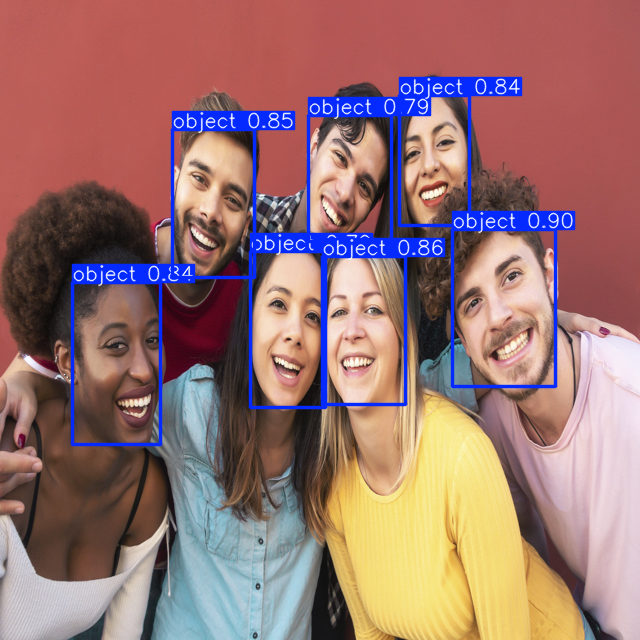

In [17]:
# Начиная с какой вероятности отрисовывать детекции
model.conf = 0.40
# Читаем картинку
#img = T.ToPILImage()(read_image('/home/lbeno/ds_Elbrus_/phase_2_projects/cv_project/yolov5/data/images/val/0af4a09ce6783cb6.jpg'))
url = 'https://www.socialnicole.com/wp-content/uploads/2015/02/youngsters.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((640, 640))
model.eval()
with torch.inference_mode():
    results = model(img)
# results.show()  # or .show(), .save(), .crop(), .pandas(), render(), etc
results.show()

In [18]:
detections = results.xyxy[0]  # Detections for the first image

# Loop over each detection and apply blur to the detected area
for det in detections:
    x1, y1, x2, y2, conf, cls = det.cpu().numpy()
    # Convert coordinates to integers
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    # Define the bounding box
    box = (x1, y1, x2, y2)

    # Crop the detected area
    region = img.crop(box)

    # Apply Gaussian Blur to the cropped area
    blurred_region = region.filter(ImageFilter.GaussianBlur(radius=15))

    # Paste the blurred area back into the image
    img.paste(blurred_region, box)

# Display the image with blurred detections
# At the end of your script
#img.save('output_blurred.jpg')


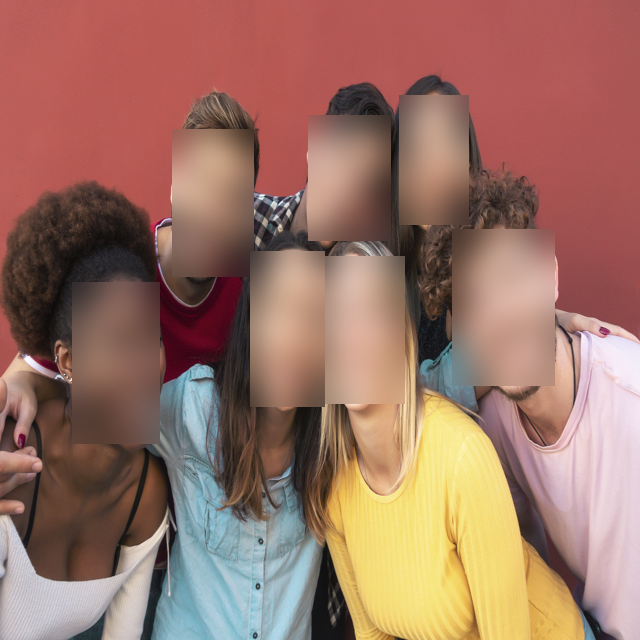

In [19]:
display(img)